<h1>Project Topic - Climate Change and its Impact on Health</h1>
<h3>Project Members:</h3>
<ul><li>Himanshu Kishor Vaghela (hkv214)</li>
<li>Ankit Tushar Desai (atd363)</li>
<li>Mukul Jangid (mdj327)</li>
<li>Varun Yogesh Dhuldhoya (vyd208)</li></ul>

<h3> Preparing data :</h3>

In [1]:
import pyspark
from pyspark.sql import SQLContext
from pyspark import SparkContext

In [2]:
sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

In [3]:
df = sqlContext.read.csv("pollution_us_2000_2016.csv", header=True)
df.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- County Code: string (nullable = true)
 |-- Site Num: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- State: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Date Local: string (nullable = true)
 |-- NO2 Units: string (nullable = true)
 |-- NO2 Mean: string (nullable = true)
 |-- NO2 1st Max Value: string (nullable = true)
 |-- NO2 1st Max Hour: string (nullable = true)
 |-- NO2 AQI: string (nullable = true)
 |-- O3 Units: string (nullable = true)
 |-- O3 Mean: string (nullable = true)
 |-- O3 1st Max Value: string (nullable = true)
 |-- O3 1st Max Hour: string (nullable = true)
 |-- O3 AQI: string (nullable = true)
 |-- SO2 Units: string (nullable = true)
 |-- SO2 Mean: string (nullable = true)
 |-- SO2 1st Max Value: string (nullable = true)
 |-- SO2 1st Max Hour: string (nullable = true)
 |-- SO2 AQI: string (nullable = tru

In [4]:
df.createOrReplaceTempView("Pollution")

In [5]:
sc.version

'2.4.5'

<h3> Processing the data type of certains columns for easy use.</h3>

In [6]:
from datetime import datetime
from pyspark.sql.types import DateType
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

In [7]:
# String to DateTime
func =  udf (lambda x: datetime.strptime(x, '%Y-%m-%d'), DateType())
df1 = df.withColumn('Date', func(col('Date Local')))


In [8]:

df1 = df1.withColumn("N02AQI", df1["NO2 AQI"].cast(DoubleType()))
df1 = df1.withColumn("SO2 AQI", df1["SO2 AQI"].cast(DoubleType()))
df1 = df1.withColumn("CO AQI", df1["CO AQI"].cast(DoubleType()))
df1 = df1.withColumn("O3 AQI", df1["O3 AQI"].cast(DoubleType()))
df1.createOrReplaceTempView("Pollution_Data")

<h3> Each day has various NO2 AQI levels. <p>We will select the daily Maximum NO2 AQI and SO2 AQI for every day of every  month with years ranging from 2000-2016</p></h3>

In [9]:
query2 = sqlContext.sql("SELECT MAX(`NO2 AQI`) as Max_NO2 , MAX(`SO2 AQI`) as SO2_AQI,MAX(`O3 AQI`) as Max_O3,MAX(`CO AQI`) as Max_CO, City,Year(Date) as Yearly FROM Pollution_Data GROUP BY Day(Date),City,Year(Date) ORDER BY City,YEAR(Date)")
query2.show()


+-------+-------+------+------+-----------+------+
|Max_NO2|SO2_AQI|Max_O3|Max_CO|       City|Yearly|
+-------+-------+------+------+-----------+------+
|     35|    3.0|  64.0|   6.0|Albuquerque|  2011|
|     40|    4.0|  64.0|   9.0|Albuquerque|  2011|
|     39|    3.0|  58.0|   8.0|Albuquerque|  2011|
|      8|    4.0|  67.0|  13.0|Albuquerque|  2011|
|     41|    3.0|  51.0|   9.0|Albuquerque|  2011|
|     44|    3.0|  51.0|  13.0|Albuquerque|  2011|
|     38|    4.0|  58.0|   6.0|Albuquerque|  2011|
|      6|    1.0|  71.0|   7.0|Albuquerque|  2011|
|      8|    3.0|  84.0|   6.0|Albuquerque|  2011|
|      8|    4.0|  50.0|   8.0|Albuquerque|  2011|
|     45|    4.0|  80.0|   8.0|Albuquerque|  2011|
|      8|    3.0|  80.0|   6.0|Albuquerque|  2011|
|      8|    4.0|  67.0|   9.0|Albuquerque|  2011|
|      8|    3.0|  71.0|  10.0|Albuquerque|  2011|
|     42|    4.0|  58.0|  10.0|Albuquerque|  2011|
|     44|    1.0|  61.0|   7.0|Albuquerque|  2011|
|      9|    3.0|  47.0|   8.0|

In [10]:
query2.createOrReplaceTempView('q2')

<h3> Select the maximum yearly AQI values for every city. </h3>

In [346]:
query2_sub = sqlContext.sql("SELECT MAX(Max_NO2) as NO2_AQI, MAX(SO2_AQI) as SO2_AQI, City, Yearly FROM q2 GROUP BY Yearly, City ORDER BY Yearly,City")


In [347]:
query2_sub.createOrReplaceTempView("q2_sub")

In [348]:
query2_sub.show()

+-------+-------+--------------------+------+
|NO2_AQI|SO2_AQI|                City|Yearly|
+-------+-------+--------------------+------+
|     74|  109.0|          Alexandria|  2000|
|      9|   69.0|             Altoona|  2000|
|      9|   33.0|        Arden-Arcade|  2000|
|      9|  112.0|             Ashland|  2000|
|     88|   17.0|         Bakersfield|  2000|
|     94|   99.0|         Baton Rouge|  2000|
|      9|  104.0|        Beaver Falls|  2000|
|      9|   26.0|       Bethel Island|  2000|
|      8|   82.0|             Bristol|  2000|
|     99|   14.0|             Burbank|  2000|
|     96|   37.0|            Calexico|  2000|
|      8|  136.0|Calumet City (PU ...|  2000|
|     97|   91.0|              Camden|  2000|
|      9|   36.0|             Capitan|  2000|
|      9|  110.0|           Charleroi|  2000|
|      9|   92.0|           Charlotte|  2000|
|     97|  102.0|             Chicago|  2000|
|      9|   62.0|         Chula Vista|  2000|
|     84|   79.0|              Cic

In [350]:
sqlContext.sql("SELECT Yearly, count(City) FROM q2_sub WHERE NO2_AQI >80 OR SO2_AQI>80 GROUP BY Yearly ORDER BY Yearly").show(100)

##Shows data

+------+-----------+
|Yearly|count(City)|
+------+-----------+
|  2000|         52|
|  2001|         41|
|  2002|         42|
|  2003|         41|
|  2004|         35|
|  2005|         34|
|  2006|         39|
|  2007|         34|
|  2008|         29|
|  2009|         20|
|  2010|         12|
|  2011|         14|
|  2012|         13|
|  2013|          7|
|  2014|         13|
|  2015|         10|
|  2016|          3|
+------+-----------+



In [355]:
sqlContext.sql("SELECT Yearly, count(City) FROM q2_sub WHERE NO2_AQI>100 OR SO2_AQI>100 GROUP BY Yearly ORDER BY Yearly").show(100)

+------+-----------+
|Yearly|count(City)|
+------+-----------+
|  2000|         26|
|  2001|         24|
|  2002|         21|
|  2003|         24|
|  2004|         22|
|  2005|         22|
|  2006|         20|
|  2007|         15|
|  2008|         10|
|  2009|          8|
|  2010|          3|
|  2011|          5|
|  2012|          4|
|  2013|          6|
|  2014|          3|
|  2015|          3|
+------+-----------+



In [354]:
sqlContext.sql("SELECT City, Yearly FROM q2_sub WHERE (NO2_AQI >200 OR SO2_AQI>200)").show(20)
##Shows data

+----+------+
|City|Yearly|
+----+------+
+----+------+



In [353]:
x = sqlContext.sql(" SELECT State, City, count(*) FROM Pollution_Data WHERE `CO AQI` > 200 OR `O3 AQI` > 200 OR `SO2 AQI`>200 OR `NO2 AQI`>200 GROUP BY State,City,YEAR(Date) ORDER BY count(City) DESC")
#, SUM(`CO AQI`,`O3 AQI`,`SO2 AQI`,`NO2 AQI`) AS total_pollutants
print(x.count())
x.show()

50
+--------------+------------+--------+
|         State|        City|count(1)|
+--------------+------------+--------+
|    California|    Rubidoux|      28|
|    California|      Fresno|      16|
|    California|    Rubidoux|      12|
|North Carolina|   Charlotte|       8|
|North Carolina|   Charlotte|       8|
|  Pennsylvania|     Bristol|       8|
|    California|    Rubidoux|       8|
|  Pennsylvania|  Norristown|       8|
|         Texas|      Dallas|       8|
|         Texas|     Houston|       8|
|         Texas|     Houston|       8|
|    California|     Burbank|       4|
|    California|     Fontana|       4|
|  Pennsylvania|  Pittsburgh|       4|
|  Pennsylvania|   Lancaster|       4|
|    California|Arden-Arcade|       4|
|  Pennsylvania|     Bristol|       4|
|         Texas|      Dallas|       4|
|         Texas|     Houston|       4|
|      New York|    New York|       4|
+--------------+------------+--------+
only showing top 20 rows



In [24]:
yearly_polluted =sqlContext.sql("SELECT State, City, MAX(`N02AQI`) as Max_NO2_AQI , YEAR(Date) as Yearly FROM Pollution_Data WHERE `N02AQI`>80 GROUP BY YEAR(Date),City,State ORDER BY  YEAR(Date),MAX(`N02AQI`) DESC")


In [25]:
yearly_polluted.createOrReplaceTempView("most_polluted_cities_yearly")


In [26]:
sqlContext.sql("select Max(`NO2 AQI`), Max(`SO2 AQI`), MAX(`O3 AQI`), MAX(`CO AQI`), YEAR(Date) as Yearly from Pollution_Data group by YEAR(Date) order by YEAR(Date)").show()

+------------+------------+-----------+-----------+------+
|max(NO2 AQI)|max(SO2 AQI)|max(O3 AQI)|max(CO AQI)|Yearly|
+------------+------------+-----------+-----------+------+
|          99|       172.0|      207.0|      201.0|  2000|
|          99|       195.0|      204.0|      138.0|  2001|
|          99|       200.0|      206.0|      136.0|  2002|
|          99|       173.0|      210.0|       94.0|  2003|
|          99|       177.0|      202.0|      115.0|  2004|
|          99|       169.0|      206.0|       96.0|  2005|
|          99|       200.0|      206.0|      150.0|  2006|
|          99|       176.0|      211.0|       81.0|  2007|
|          99|       125.0|      207.0|       90.0|  2008|
|          99|       120.0|      206.0|       81.0|  2009|
|          96|       103.0|      200.0|       78.0|  2010|
|          99|       161.0|      204.0|       67.0|  2011|
|          97|       161.0|      201.0|       55.0|  2012|
|          94|       117.0|      218.0|       56.0|  201

<h3> Yearly most polluted cities ordered in Desceding order by AQI Levels with years ranging from 2000-2016.</h3>

In [27]:
temp1=sqlContext.sql("SELECT State,City, MAX(`N02AQI`) as Max_NO2_AQI , MAX(`SO2 AQI`) as Max_SO2_AQI , MAX(`O3 AQI`) AS MAX_O3_AQI, MAX(`CO AQI`) AS Max_CO_AQI, YEAR(Date) as Yearly FROM Pollution_Data GROUP BY YEAR(Date),City,State ORDER BY  YEAR(Date)")

temp1.show()

##Shows data

+--------------------+--------------------+-----------+-----------+----------+----------+------+
|               State|                City|Max_NO2_AQI|Max_SO2_AQI|MAX_O3_AQI|Max_CO_AQI|Yearly|
+--------------------+--------------------+-----------+-----------+----------+----------+------+
|          California|          Long Beach|      108.0|       65.0|     114.0|      63.0|  2000|
|             Indiana|Indianapolis (Rem...|       58.0|       89.0|     142.0|      33.0|  2000|
|          California|             Concord|       72.0|       29.0|     147.0|      31.0|  2000|
|            Virginia|          Alexandria|       74.0|      109.0|     150.0|      25.0|  2000|
|        Pennsylvania|           Lancaster|       55.0|       79.0|     177.0|      19.0|  2000|
|          California|Vandenberg Air Fo...|       31.0|        6.0|      80.0|       6.0|  2000|
|        Pennsylvania|          Pittsburgh|       74.0|      117.0|     169.0|      18.0|  2000|
|              Kansas|        

In [28]:

temp1.createOrReplaceTempView("Entire_Pollution")

<h3> We wanted to check which cities have constantly featured as having a higher pollution level as compared to other cities. <p><p> We ranked every city based on their pollution level and found the top polluted cities.<p> These cities have constantly shown up in many consecutive years.<p> </h3>

In [29]:
Top_polluted=sqlContext.sql("SELECT State,City,COUNT(Yearly) as Count  FROM most_polluted_cities_yearly GROUP BY City,State ORDER BY COUNT(Yearly) DESC LIMIT 10")
Top_polluted.createOrReplaceTempView("Top_polluted_cities")

Top_polluted.toPandas().to_csv("TopPolluted.csv")


In [30]:
Top_polluted.show(20)

##Show data

+--------------------+------------+-----+
|               State|        City|Count|
+--------------------+------------+-----+
|          California|    Calexico|   16|
|          California| Los Angeles|   15|
|          California|  Long Beach|   14|
|            New York|    New York|   13|
|District Of Columbia|  Washington|   11|
|          California|   San Diego|   11|
|            Colorado|       Welby|   11|
|          California|     Burbank|   11|
|        Pennsylvania|Philadelphia|   10|
|               Texas|     El Paso|   10|
+--------------------+------------+-----+



In [31]:
State_Polluted_Data=sqlContext.sql("SELECT Top_polluted_cities.City as City, Top_polluted_cities.State as State, most_polluted_cities_yearly.Max_NO2_AQI, most_polluted_cities_yearly.Yearly  as Yearly FROM Top_polluted_cities JOIN most_polluted_cities_yearly ON Top_polluted_cities.City=most_polluted_cities_yearly.City GROUP BY Top_polluted_cities.`City`,most_polluted_cities_yearly.Max_NO2_AQI,most_polluted_cities_yearly.Yearly ,Top_polluted_cities.`State` ORDER BY Top_polluted_cities.`City`,most_polluted_cities_yearly.Yearly  ")

State_Polluted_Data.toPandas().to_csv("State_Polluted_Data.csv")



## save .csv file

In [32]:
table=sqlContext.sql("SELECT Top_polluted_cities.City as City, most_polluted_cities_yearly.Max_NO2_AQI, most_polluted_cities_yearly.Yearly  as Yearly FROM Top_polluted_cities JOIN most_polluted_cities_yearly ON Top_polluted_cities.City=most_polluted_cities_yearly.City GROUP BY Top_polluted_cities.`City`,most_polluted_cities_yearly.Max_NO2_AQI,most_polluted_cities_yearly.Yearly  ORDER BY Top_polluted_cities.`City`,most_polluted_cities_yearly.Yearly  ")

table.show()


+--------+-----------+------+
|    City|Max_NO2_AQI|Yearly|
+--------+-----------+------+
| Burbank|      113.0|  2000|
| Burbank|      129.0|  2001|
| Burbank|      131.0|  2002|
| Burbank|      108.0|  2003|
| Burbank|      105.0|  2004|
| Burbank|       88.0|  2005|
| Burbank|      101.0|  2006|
| Burbank|       86.0|  2007|
| Burbank|      102.0|  2008|
| Burbank|       87.0|  2009|
| Burbank|       81.0|  2010|
|Calexico|      118.0|  2000|
|Calexico|      108.0|  2001|
|Calexico|      108.0|  2002|
|Calexico|      111.0|  2003|
|Calexico|      102.0|  2004|
|Calexico|      107.0|  2005|
|Calexico|      101.0|  2006|
|Calexico|      102.0|  2007|
|Calexico|      110.0|  2008|
+--------+-----------+------+
only showing top 20 rows



In [33]:
table.createOrReplaceTempView("Final_Table")

table.toPandas().to_csv("Non_Pivoted_Table.csv")
## save .csv file

In [34]:
type(table)


pyspark.sql.dataframe.DataFrame

In [35]:
table=table.toPandas()

In [36]:
type(table)



pandas.core.frame.DataFrame

<h3>We pivoted the tabled based on the cities, with their yearly AQI values as rows to plot the table on a graph using R </h3>

In [37]:
table=table.pivot(index= 'Yearly',columns='City', values='Max_NO2_AQI')


In [38]:
table

City,Burbank,Calexico,El Paso,Long Beach,Los Angeles,New York,Philadelphia,San Diego,Washington,Welby
Yearly,,,,,,,,,,
2000,113.0,118.0,99.0,108.0,111.0,101.0,95.0,104.0,109.0,109.0
2001,129.0,108.0,101.0,105.0,112.0,102.0,87.0,110.0,88.0,102.0
2002,131.0,108.0,111.0,106.0,112.0,102.0,85.0,106.0,101.0,NaN
2003,108.0,111.0,100.0,107.0,113.0,105.0,100.0,110.0,101.0,108.0
2004,105.0,102.0,81.0,105.0,112.0,109.0,101.0,106.0,104.0,103.0
2005,88.0,107.0,82.0,108.0,106.0,91.0,85.0,103.0,104.0,96.0
2006,101.0,101.0,103.0,101.0,103.0,91.0,102.0,97.0,104.0,89.0
2007,86.0,102.0,89.0,102.0,102.0,101.0,87.0,101.0,81.0,103.0
2008,102.0,110.0,88.0,106.0,105.0,82.0,NaN,105.0,101.0,84.0


In [39]:
import numpy as np

for item in list(table):
    means=np.nanmean(table[item])
    table[item].fillna(means,inplace=True)


In [40]:
table
table.astype('float64')

City,Burbank,Calexico,El Paso,Long Beach,Los Angeles,New York,Philadelphia,San Diego,Washington,Welby
Yearly,,,,,,,,,,
2000,113.000000,118.0000,99.0,108.000000,111.000000,101.000000,95.0,104.000000,109.000000,109.000000
2001,129.000000,108.0000,101.0,105.000000,112.000000,102.000000,87.0,110.000000,88.000000,102.000000
2002,131.000000,108.0000,111.0,106.000000,112.000000,102.000000,85.0,106.000000,101.000000,96.909091
2003,108.000000,111.0000,100.0,107.000000,113.000000,105.000000,100.0,110.000000,101.000000,108.000000
2004,105.000000,102.0000,81.0,105.000000,112.000000,109.000000,101.0,106.000000,104.000000,103.000000
2005,88.000000,107.0000,82.0,108.000000,106.000000,91.000000,85.0,103.000000,104.000000,96.000000
2006,101.000000,101.0000,103.0,101.000000,103.000000,91.000000,102.0,97.000000,104.000000,89.000000
2007,86.000000,102.0000,89.0,102.000000,102.000000,101.000000,87.0,101.000000,81.000000,103.000000
2008,102.000000,110.0000,88.0,106.000000,105.000000,82.000000,93.4,105.000000,101.000000,84.000000


In [41]:
table.to_csv("Polluted_cities_NO2AQI.csv")

## save .csv file

In [42]:
df1

DataFrame[_c0: string, State Code: string, County Code: string, Site Num: string, Address: string, State: string, County: string, City: string, Date Local: string, NO2 Units: string, NO2 Mean: string, NO2 1st Max Value: string, NO2 1st Max Hour: string, NO2 AQI: string, O3 Units: string, O3 Mean: string, O3 1st Max Value: string, O3 1st Max Hour: string, O3 AQI: double, SO2 Units: string, SO2 Mean: string, SO2 1st Max Value: string, SO2 1st Max Hour: string, SO2 AQI: double, CO Units: string, CO Mean: string, CO 1st Max Value: string, CO 1st Max Hour: string, CO AQI: double, Date: date, N02AQI: double]

<h3> <font color='blue'> Linking the Pollution Dataset with the Land Temperature Data set.</font> </h3>

In [43]:
sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
df = sqlContext.read.csv("GlobalLandTemperaturesByCity.csv", header=True)



In [44]:
df.printSchema()

root
 |-- dt: string (nullable = true)
 |-- AverageTemperature: string (nullable = true)
 |-- AverageTemperatureUncertainty: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



In [45]:
df.describe()

DataFrame[summary: string, dt: string, AverageTemperature: string, AverageTemperatureUncertainty: string, City: string, Country: string, Latitude: string, Longitude: string]

In [46]:
func =  udf (lambda x: datetime.strptime(x, '%Y-%m-%d'), DateType())
# String to DateTime format using UDF
df = df.withColumn('Dt', func(col('dt')))

In [47]:
df.createOrReplaceTempView("City_Data")

In [48]:
df.show(10)

## show data

+----------+------------------+-----------------------------+-----+-------+--------+---------+
|        Dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
|1743-11-01|             6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|
|1743-12-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-01-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-02-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-03-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-04-01|5.7879999999999985|           3.6239999999999997|Århus|Denmark|  57.05N|   10.33E|
|1744-05-01|            10.644|           1.2830000000000001|Århus|Denmark|  57.05N|   10.33E|
|1744-06-01|14.050999999999998|                   

In [49]:
query3=sqlContext.sql("SELECT  City, MAX(`N02AQI`) as Max_NO2_AQI , MAX(`SO2 AQI`) as Max_SO2_AQI, MAX(`CO AQI`) as Max_CO_AQI, MAX(`O3 AQI`) as Max_O3_AQI , first(Date) AS Year FROM Pollution_Data  GROUP BY YEAR(Date) , City ORDER BY YEAR(Date), City")


In [50]:
query3.createOrReplaceTempView("Polls")

<h3> Every city according to yearly max pollutant values. </h3>

In [51]:
sqlContext.sql("SELECT * FROM Polls where City=='Burbank'").show(20)

## show data

+-------+-----------+-----------+----------+----------+----------+
|   City|Max_NO2_AQI|Max_SO2_AQI|Max_CO_AQI|Max_O3_AQI|      Year|
+-------+-----------+-----------+----------+----------+----------+
|Burbank|      113.0|       14.0|      68.0|     202.0|2000-01-01|
|Burbank|      129.0|       19.0|      56.0|     172.0|2001-01-01|
|Burbank|      131.0|       19.0|      51.0|     150.0|2002-01-01|
|Burbank|      108.0|       19.0|      51.0|     177.0|2003-01-01|
|Burbank|      105.0|       34.0|      39.0|     172.0|2004-01-14|
|Burbank|       88.0|       19.0|      39.0|     182.0|2005-01-01|
|Burbank|      101.0|       13.0|      39.0|     206.0|2006-01-01|
|Burbank|       86.0|       11.0|      32.0|     151.0|2007-01-01|
|Burbank|      102.0|       10.0|      28.0|     185.0|2008-01-01|
|Burbank|       87.0|       19.0|      33.0|     151.0|2009-01-01|
|Burbank|       81.0|       20.0|      26.0|     122.0|2010-01-01|
|Burbank|       65.0|        3.0|      27.0|     122.0|2011-01

<h3> Average yearly temperature for each city. </h3>

In [52]:
query2=sqlContext.sql(" SELECT YEAR(Dt) as Years,City, AVG(AverageTemperature) AS Yearly_Avg_Temp FROM City_Data GROUP BY YEAR(Dt), City")


In [53]:
query2.show()

+-----+---------+------------------+
|Years|     City|   Yearly_Avg_Temp|
+-----+---------+------------------+
| 1767|    Århus| 6.946416666666668|
| 1781|    Århus| 8.528916666666667|
| 1766|    Çorlu|          13.39575|
| 1868|    Çorlu|           13.0665|
| 1938|  Öskemen|1.3139999999999992|
| 1988|  Öskemen|2.1085000000000007|
| 1994| A Coruña|13.764333333333335|
| 1840|   Aachen|7.8524166666666675|
| 1840|  Aalborg| 6.725416666666667|
| 1863|  Aalborg| 8.568416666666666|
| 1880|      Aba|25.996166666666667|
| 1888|      Aba|25.647000000000002|
| 1900|      Aba|26.418833333333335|
| 1917|      Aba| 26.94966666666667|
| 1932|      Aba|26.749749999999995|
| 1914|Abakaliki|26.909999999999997|
| 1838|   Abakan|-1.885833333333333|
| 1914|   Abakan|0.2978333333333338|
| 1979|   Abakan|0.6380833333333328|
| 1860| Aberdeen| 6.903583333333333|
+-----+---------+------------------+
only showing top 20 rows



In [54]:
query2.createOrReplaceTempView("City_Temp")

In [55]:
yearly_pollution=sqlContext.sql("SELECT Polls.City, Max(Polls.Max_NO2_AQI) ,Max(Polls.Max_SO2_AQI),Polls.Max_CO_AQI,Polls.Max_O3_AQI, Polls.Year FROM Polls JOIN City_Temp ON YEAR(Polls.Year)==City_Temp.Years AND Polls.City==City_Temp.City Group by City_Temp.Years, Polls.City, Polls.Max_NO2_AQI, Polls.Max_SO2_AQI, Polls.Max_CO_AQI,Polls.Max_O3_AQI, Polls.Year ORDER BY Polls.Year, Polls.City ")



In [56]:
yearly_pollution.show(100)

# More time

+-------------+----------------+----------------+----------+----------+----------+
|         City|max(Max_NO2_AQI)|max(Max_SO2_AQI)|Max_CO_AQI|Max_O3_AQI|      Year|
+-------------+----------------+----------------+----------+----------+----------+
|  Baton Rouge|            94.0|            99.0|      48.0|     187.0|2000-01-01|
|      Burbank|           113.0|            14.0|      68.0|     202.0|2000-01-01|
|  Chula Vista|            70.0|            62.0|      35.0|     104.0|2000-01-01|
|      Concord|            72.0|            29.0|      31.0|     147.0|2000-01-01|
|   Costa Mesa|           102.0|            29.0|      69.0|     127.0|2000-01-01|
|       Dallas|            97.0|            19.0|      25.0|     177.0|2000-01-01|
|      Houston|           101.0|           172.0|      42.0|     203.0|2000-01-01|
|  Kansas City|            74.0|           101.0|      57.0|     132.0|2000-01-01|
|   Long Beach|           108.0|            65.0|      63.0|     114.0|2000-01-01|
| Ph

In [57]:
yearly_pollution.toPandas().to_csv("temp_pollution.csv")

# More time

<h3> <p>We will join the two tables - Global Land Temperature Data set, Pollution Data Set to display all the pollution levels caused by different air pollutants vs their temperature for each city. </p> </h3>

In [58]:
yearly_pollution=sqlContext.sql("SELECT Polls.City, City_Temp.Yearly_Avg_Temp , Max(Polls.Max_NO2_AQI) AS max_NO2 ,Max(Polls.Max_SO2_AQI) AS MAX_SO2,Polls.Max_CO_AQI AS MAX_CO,Polls.Max_O3_AQI as MAX_03, Polls.Year FROM Polls JOIN City_Temp ON YEAR(Polls.Year)==City_Temp.Years AND Polls.City==City_Temp.City Group by City_Temp.Years, Polls.City, Polls.Max_NO2_AQI, Polls.Max_SO2_AQI, Polls.Max_CO_AQI,Polls.Max_O3_AQI, Polls.Year,City_Temp.Yearly_Avg_Temp ORDER BY Polls.Year, Polls.City ")



In [59]:
yearly_pollution.toPandas().to_csv("temperature_pollution_Rerun.csv")

# More time

In [60]:
yearly_pollution.createOrReplaceTempView("Temperature_Pollution_Dataset")

In [61]:
temperature_table=sqlContext.sql("SELECT * FROM Temperature_Pollution_Dataset ORDER BY Year(Year),max_NO2,MAX_SO2,MAX_CO,MAX_03  ")



In [62]:
temperature_table.show(40)

## show data
# More time

+-------------+------------------+-------+-------+------+------+----------+
|         City|   Yearly_Avg_Temp|max_NO2|MAX_SO2|MAX_CO|MAX_03|      Year|
+-------------+------------------+-------+-------+------+------+----------+
|    Charleroi|            11.368|   43.0|  110.0|  11.0| 169.0|2000-03-31|
|    Lancaster|16.643333333333334|   55.0|   79.0|  19.0| 177.0|2000-03-31|
|      Reading|11.226416666666667|   57.0|  135.0|  22.0| 172.0|2000-03-31|
|   Louisville|13.499749999999999|   58.0|  128.0|  20.0| 129.0|2000-03-21|
|      Vallejo|15.022000000000004|   62.0|   24.0|  57.0|  47.0|2000-01-01|
|         York| 9.526916666666667|   63.0|  104.0|  22.0| 177.0|2000-03-31|
|    San Pablo|26.966749999999994|   64.0|   39.0|  22.0|  74.0|2000-01-01|
|      Bristol| 9.970083333333335|   64.0|   82.0|  19.0| 207.0|2000-03-31|
|  Chula Vista|16.900083333333335|   70.0|   62.0|  35.0| 104.0|2000-01-01|
|    Henderson|            18.509|   71.0|  136.0|  17.0| 122.0|2000-02-29|
|San Francis

In [63]:
temperature_table.toPandas().to_csv("Temperature_Values.csv")

# More time

<h3> Decision Tree Model to predict the future temperature values of a city based on the pollution levels. </h3>

In [64]:
table11 = sqlContext.sql("SELECT Yearly_Avg_Temp,max_NO2, MAX_SO2, MAX_CO,MAX_03 FROM Temperature_Pollution_Dataset")


In [65]:
table11.createOrReplaceTempView("Model_Dataset")


In [66]:
df = table11.toPandas()
df.to_csv("Model_Data.csv")


In [67]:
dataFrame=sc.textFile("Model_Data.csv")
header = dataFrame.first()
dataFrame = dataFrame.filter(lambda x: x!=header)

In [68]:
type(dataFrame)


pyspark.rdd.PipelinedRDD

In [69]:
#start


dataFrame = sc.parallelize(dataFrame.collect())
type(dataFrame)

pyspark.rdd.RDD

In [70]:
dataFrame=dataFrame.map(lambda line: line.split(','))
dataFrame

PythonRDD[604] at RDD at PythonRDD.scala:53

In [71]:
dataFrame.take(10)

[['0', '21.092500000000005', '94.0', '99.0', '48.0', '187.0'],
 ['1', '16.643333333333334', '113.0', '14.0', '68.0', '202.0'],
 ['2', '16.900083333333335', '70.0', '62.0', '35.0', '104.0'],
 ['3', '15.022000000000004', '72.0', '29.0', '31.0', '147.0'],
 ['4', '16.900083333333335', '102.0', '29.0', '69.0', '127.0'],
 ['5', '18.89666666666667', '97.0', '19.0', '25.0', '177.0'],
 ['6', '21.342000000000002', '101.0', '172.0', '42.0', '203.0'],
 ['7', '12.726750000000003', '74.0', '101.0', '57.0', '132.0'],
 ['8', '16.900083333333335', '108.0', '65.0', '63.0', '114.0'],
 ['9', '12.311666666666667', '95.0', '89.0', '51.0', '140.0']]

<h1> Decision Tree Model </h1>

<p><b> A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. 
The paths from root to leaf represent classification rules. We are makind Decision Tree Model using MLLIB</b></p>

In [72]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


In [73]:
# We divide the training data and testing data in 75% and 25% respectively randomly.
(trainingData, testData) = dataFrame.randomSplit([0.75, 0.25])

def parse(line):
    value=[x for x in line]
    return LabeledPoint(value[1], value[2:])

TrainParseData = trainingData.map(parse)
TestParseData=testData.map(parse)

In [74]:
# Train a DecisionTree model.

model = DecisionTree.trainRegressor(TrainParseData, categoricalFeaturesInfo={},impurity='variance', maxDepth=5, maxBins=32)


In [75]:
# Evaluate model on test instances and compute test error
predictions = model.predict(TestParseData.map(lambda x: x.features))
labelsAndPredictions = TestParseData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum()/float(TestParseData.count())



In [76]:
import pandas as pd
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
yearly_avg_encoded = lab_enc.fit_transform(df.Yearly_Avg_Temp)
df

,Yearly_Avg_Temp,max_NO2,MAX_SO2,MAX_CO,MAX_03
0,21.092500,94.0,99.0,48.0,187.0
1,16.643333,113.0,14.0,68.0,202.0
2,16.900083,70.0,62.0,35.0,104.0
3,15.022000,72.0,29.0,31.0,147.0
4,16.900083,102.0,29.0,69.0,127.0
...,...,...,...,...,...
546,17.288000,26.0,56.0,9.0,90.0
547,12.286111,41.0,1.0,7.0,61.0
548,9.946444,39.0,16.0,3.0,34.0
549,15.031111,48.0,39.0,16.0,40.0


In [77]:
print('Test Mean Squared Error = ' + str(testMSE))
print('Learned regression tree model:')
print(model.toDebugString())

Test Mean Squared Error = 13.706356603781341
Learned regression tree model:
DecisionTreeModel regressor of depth 5 with 55 nodes
  If (feature 1 <= 30.5)
   If (feature 1 <= 10.5)
    If (feature 3 <= 98.5)
     If (feature 1 <= 8.0)
      If (feature 0 <= 47.5)
       Predict: 12.133981481481479
      Else (feature 0 > 47.5)
       Predict: 10.073805555555557
     Else (feature 1 > 8.0)
      If (feature 2 <= 6.5)
       Predict: 9.854333333333335
      Else (feature 2 > 6.5)
       Predict: 15.015677083333333
    Else (feature 3 > 98.5)
     If (feature 3 <= 132.5)
      If (feature 2 <= 8.5)
       Predict: 19.20375
      Else (feature 2 > 8.5)
       Predict: 15.377056944444444
     Else (feature 3 > 132.5)
      If (feature 3 <= 146.0)
       Predict: 17.66398611111111
      Else (feature 3 > 146.0)
       Predict: 19.152772222222218
   Else (feature 1 > 10.5)
    If (feature 2 <= 12.0)
     If (feature 1 <= 29.5)
      If (feature 3 <= 72.5)
       Predict: 27.04478125
      Else

In [78]:
query_test=sqlContext.sql("SELECT  Max_NO2_AQI,Max_SO2_AQI,Max_CO_AQI, Max_O3_AQI from Polls where YEAR(Year)>2013")
query_test.toPandas().to_csv("test_data.csv")


In [79]:
test_table=0
all_data=sqlContext.sql("SELECT  Year,City,Max_NO2_AQI,Max_SO2_AQI,Max_CO_AQI, Max_O3_AQI from Polls where YEAR(Year)>2013")

all_data.show()

## Show data

+----------+-------------+-----------+-----------+----------+----------+
|      Year|         City|Max_NO2_AQI|Max_SO2_AQI|Max_CO_AQI|Max_O3_AQI|
+----------+-------------+-----------+-----------+----------+----------+
|2014-01-01|  Albuquerque|       43.0|       92.0|      15.0|      87.0|
|2014-01-01| Arden-Arcade|       41.0|        7.0|      19.0|     122.0|
|2014-01-02|       Austin|       34.0|       10.0|       5.0|      97.0|
|2014-01-01|  Baton Rouge|       55.0|       54.0|      47.0|     129.0|
|2014-01-01|   Beltsville|       40.0|       20.0|      10.0|     101.0|
|2014-01-01|Bethel Island|       31.0|       14.0|       8.0|     101.0|
|2014-01-01|   Birmingham|       82.0|       97.0|      11.0|      90.0|
|2014-05-02|       Blaine|       37.0|       11.0|       8.0|      93.0|
|2014-01-01|       Boston|       60.0|       40.0|      13.0|      54.0|
|2014-01-01|      Bristol|       50.0|       20.0|      16.0|      84.0|
|2014-01-01|      Burbank|       71.0|        6.0| 

In [80]:
sqlContext.sql("select * from Polls").show()

+--------------------+-----------+-----------+----------+----------+----------+
|                City|Max_NO2_AQI|Max_SO2_AQI|Max_CO_AQI|Max_O3_AQI|      Year|
+--------------------+-----------+-----------+----------+----------+----------+
|          Alexandria|       74.0|      109.0|      25.0|     150.0|2000-03-31|
|             Altoona|       61.0|       69.0|      11.0|     151.0|2000-03-31|
|        Arden-Arcade|       60.0|       33.0|      52.0|     161.0|2000-03-01|
|             Ashland|       64.0|      112.0|      13.0|     124.0|2000-02-29|
|         Bakersfield|       88.0|       17.0|      43.0|      40.0|2000-11-01|
|         Baton Rouge|       94.0|       99.0|      48.0|     187.0|2000-01-01|
|        Beaver Falls|       74.0|      104.0|      11.0|     161.0|2000-03-31|
|       Bethel Island|       41.0|       26.0|      17.0|     124.0|2000-01-01|
|             Bristol|       64.0|       82.0|      19.0|     207.0|2000-03-31|
|             Burbank|      113.0|      

In [81]:
all_data=all_data.toPandas()

In [82]:
query_test.createOrReplaceTempView("Table")

In [83]:
Panda_temp_table=query_test.toPandas()

In [84]:
query_test.describe()

DataFrame[summary: string, Max_NO2_AQI: string, Max_SO2_AQI: string, Max_CO_AQI: string, Max_O3_AQI: string]

In [85]:
type(query_test)

pyspark.sql.dataframe.DataFrame

In [86]:
query_test1=query_test.collect()

In [87]:
query_test.collect()[0].Max_SO2_AQI

92.0

In [88]:
len(query_test.collect())

218

<h3><b> Using test data set to predict the values of temperature based on pollution level of each city. </h3></b>

In [89]:

list_predict=[]
for i in range(len(query_test.collect())):
    list_new=[query_test.collect()[i].Max_NO2_AQI,query_test.collect()[i].Max_SO2_AQI,query_test.collect()[i].Max_CO_AQI,query_test.collect()[i].Max_O3_AQI]
    list_predict.append(model.predict(list_new))

#more time

In [90]:
print(list_predict)

[13.930962741144846, 15.377056944444444, 9.854333333333335, 17.32392647058824, 20.90945949074074, 20.90945949074074, 12.39389673913043, 20.90945949074074, 13.930962741144846, 19.096124999999997, 15.377056944444444, 16.97789703960015, 19.096124999999997, 13.930962741144846, 13.930962741144846, 19.096124999999997, 13.930962741144846, 13.930962741144846, 13.930962741144846, 20.90945949074074, 16.97789703960015, 15.377056944444444, 27.04478125, 9.915444444444445, 16.97789703960015, 12.133981481481479, 17.66398611111111, 15.01975, 9.915444444444445, 13.930962741144846, 15.377056944444444, 16.97789703960015, 20.90945949074074, 13.930962741144846, 12.133981481481479, 12.39389673913043, 19.152772222222218, 19.152772222222218, 13.930962741144846, 13.930962741144846, 12.39389673913043, 13.930962741144846, 13.930962741144846, 12.39389673913043, 15.377056944444444, 16.97789703960015, 16.97789703960015, 13.930962741144846, 19.096124999999997, 19.096124999999997, 16.97789703960015, 19.09612499999999

In [91]:
all_data['Temperature_Predicted']=list_predict

In [92]:
all_data

,Year,City,Max_NO2_AQI,Max_SO2_AQI,Max_CO_AQI,Max_O3_AQI,Temperature_Predicted
0,2014-01-01,Albuquerque,43.0,92.0,15.0,87.0,13.930963
1,2014-01-01,Arden-Arcade,41.0,7.0,19.0,122.0,15.377057
2,2014-01-02,Austin,34.0,10.0,5.0,97.0,9.854333
3,2014-01-01,Baton Rouge,55.0,54.0,47.0,129.0,17.323926
4,2014-01-01,Beltsville,40.0,20.0,10.0,101.0,20.909459
...,...,...,...,...,...,...,...
213,2016-03-04,Washington,55.0,11.0,9.0,93.0,20.909459
214,2016-01-01,Welby,62.0,14.0,18.0,49.0,19.096125
215,2016-01-01,Wilmington,58.0,13.0,16.0,61.0,19.096125
216,2016-01-01,Winter Park,38.0,7.0,15.0,67.0,12.133981


In [93]:
all_data.to_csv("Predicted_temperatures_DT.csv")

In [94]:
list_of_data=[]

for i in range(len(query_test.collect())):
    list_of_data.append([list_predict[i],query_test.collect()[i].Max_NO2_AQI,query_test.collect()[i].Max_SO2_AQI,query_test.collect()[i].Max_CO_AQI,query_test.collect()[i].Max_O3_AQI])

In [95]:
list_of_data

[[13.930962741144846, 43.0, 92.0, 15.0, 87.0],
 [15.377056944444444, 41.0, 7.0, 19.0, 122.0],
 [9.854333333333335, 34.0, 10.0, 5.0, 97.0],
 [17.32392647058824, 55.0, 54.0, 47.0, 129.0],
 [20.90945949074074, 40.0, 20.0, 10.0, 101.0],
 [20.90945949074074, 31.0, 14.0, 8.0, 101.0],
 [12.39389673913043, 82.0, 97.0, 11.0, 90.0],
 [20.90945949074074, 37.0, 11.0, 8.0, 93.0],
 [13.930962741144846, 60.0, 40.0, 13.0, 54.0],
 [19.096124999999997, 50.0, 20.0, 16.0, 84.0],
 [15.377056944444444, 71.0, 6.0, 34.0, 129.0],
 [16.97789703960015, 93.0, 16.0, 43.0, 151.0],
 [19.096124999999997, 62.0, 14.0, 17.0, 115.0],
 [13.930962741144846, 12.0, 117.0, 5.0, 151.0],
 [13.930962741144846, 42.0, 82.0, 9.0, 100.0],
 [19.096124999999997, 48.0, 11.0, 17.0, 105.0],
 [13.930962741144846, 47.0, 122.0, 9.0, 126.0],
 [13.930962741144846, 64.0, 95.0, 15.0, 97.0],
 [13.930962741144846, 45.0, 41.0, 13.0, 133.0],
 [20.90945949074074, 37.0, 13.0, 7.0, 129.0],
 [16.97789703960015, 57.0, 11.0, 22.0, 129.0],
 [15.3770569444

<h3><b> Plotting the data : </h3></b>

In [96]:
target=[]
features=[]

for i in range(len(list_of_data)-200):
    target.append(list_of_data[i][0])
    features.append(list_of_data[i][1:])



In [97]:
len(target)

18

In [98]:
target[0]

13.930962741144846

In [99]:
import matplotlib.pyplot as plt

#install

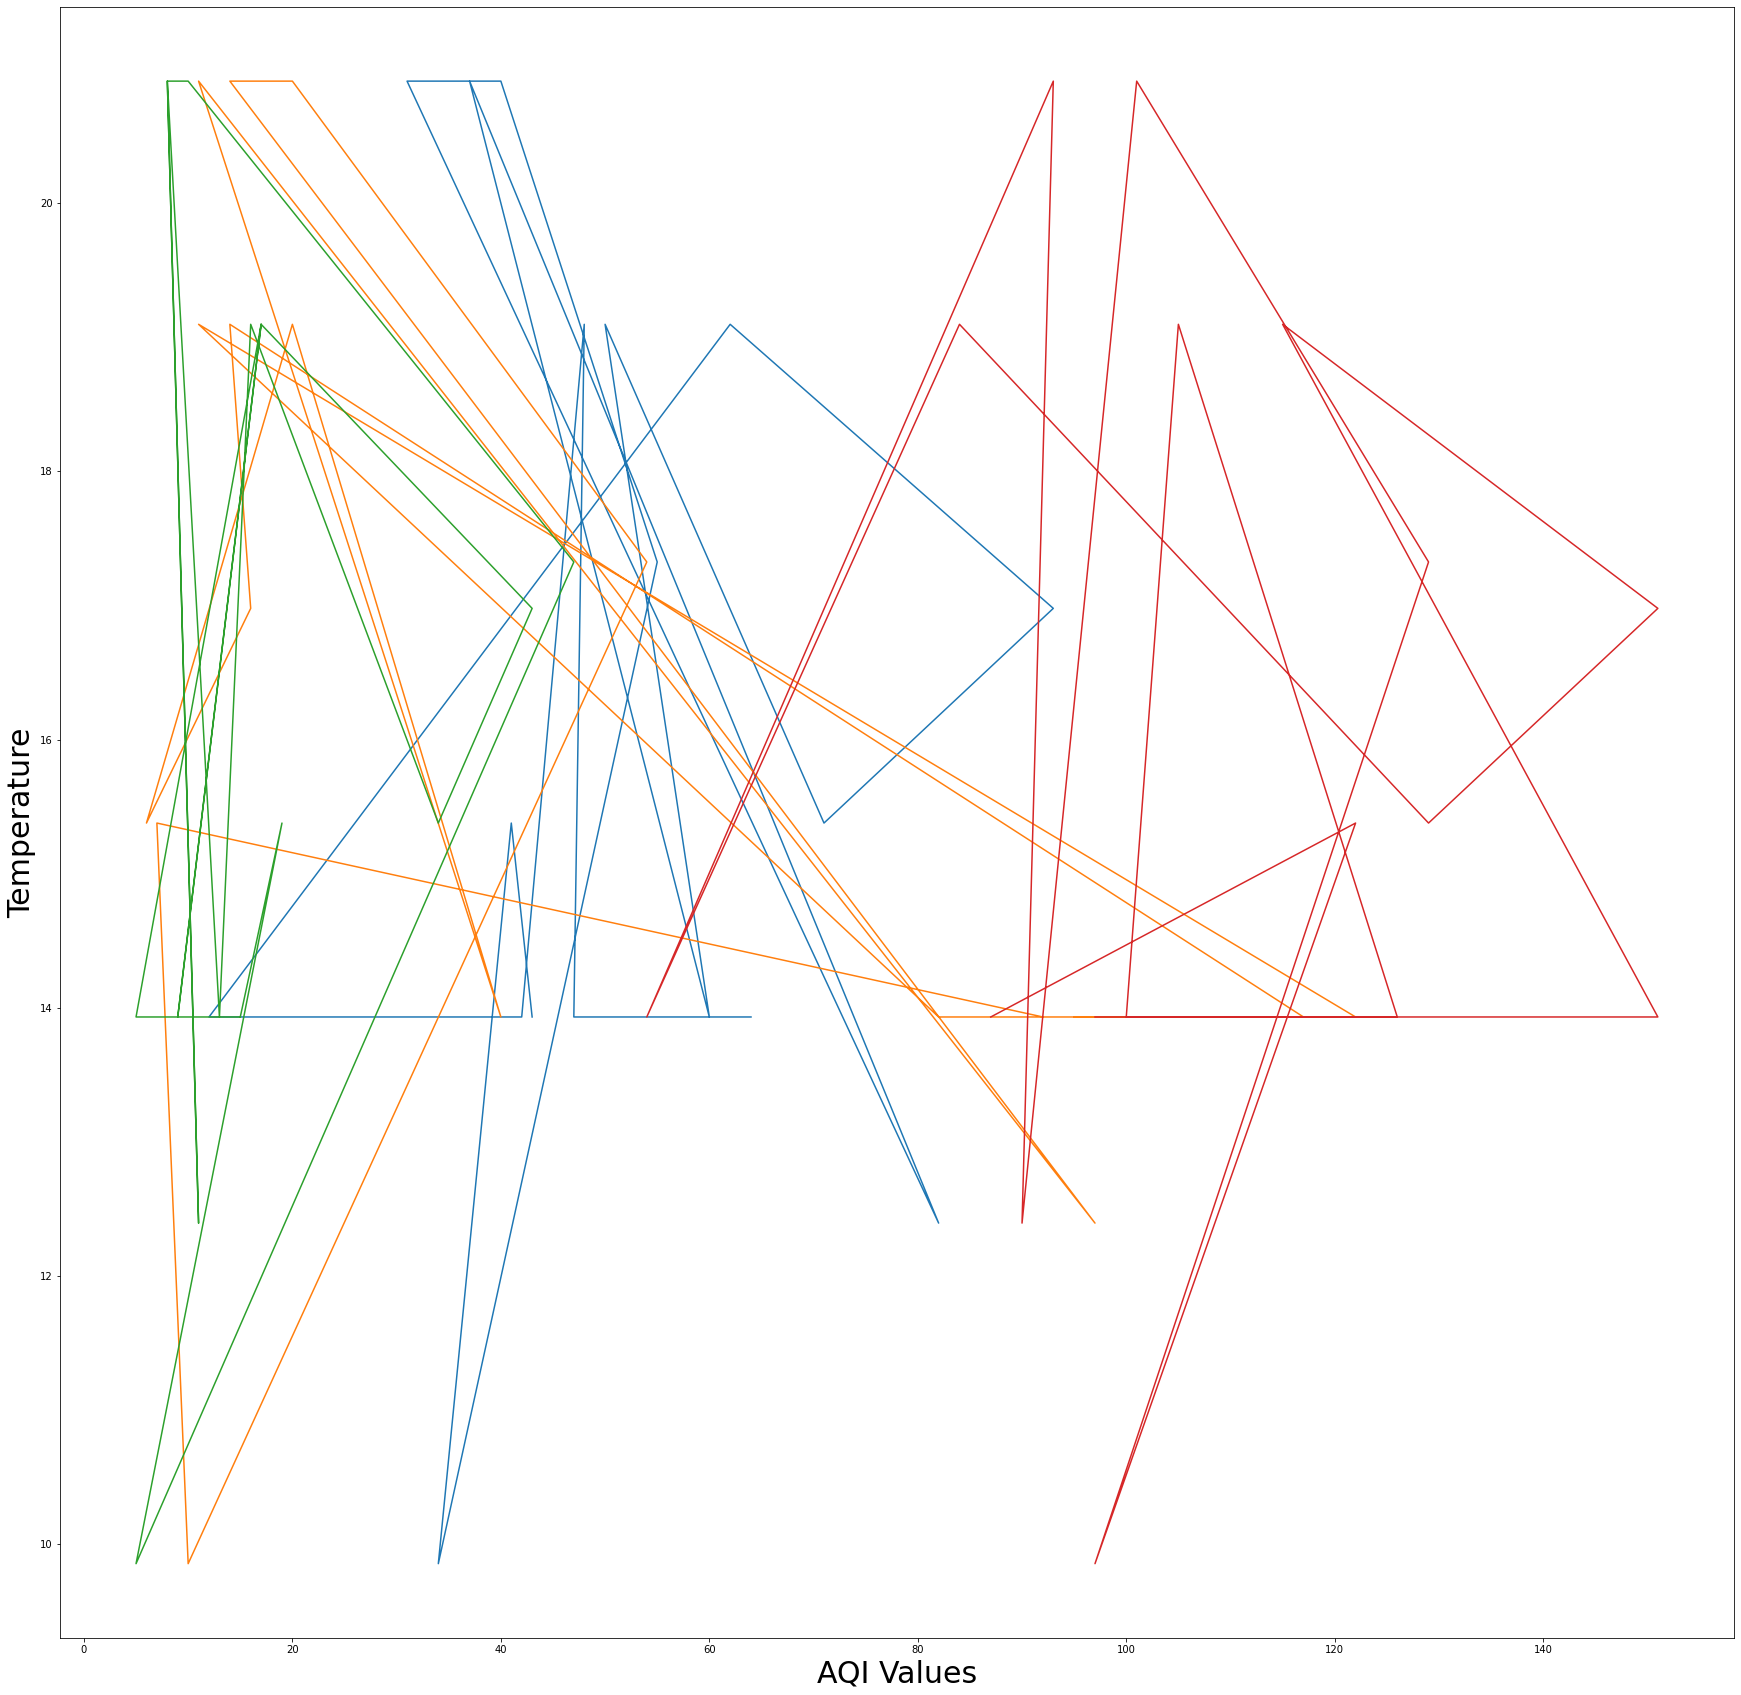

In [100]:
fig = plt.figure(figsize=[30,30])

y_values = [x for x in target]
x_values = [x for x in features]
plt.xlabel("AQI Values",fontsize=30)
plt.ylabel("Temperature",fontsize=30)
plt.plot(x_values,y_values)
plt.show()

In [244]:
import pandas as pd
import numpy as np

#install

In [245]:
causes_death=pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

In [246]:
not_wanted_diseases_list=[
                          'All Causes',
                          'Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)',
                          'Assault (homicide) by discharge of firearms (*U01.4,X93-X95)',
                          'Assault (homicide) by other and unspecified means and their sequelae (*U01.0-*U01.3,*U01.5-*U01.9,*U02,X85-X92,X96-Y09,Y87.1)'
                          'Legal intervention (Y35,Y89.0)',
                          'Events of undetermined intent (Y10-Y34,Y87.2,Y89.9)',
                          'Discharge of firearms, undetermined intent (Y22-Y24)',
                          'Other and unspecified events of undetermined intent and their sequelae (Y10-Y21,Y25-Y34,Y87.2,Y89.9)',
                          'Operations of war and their sequelae (Y36,Y89.1)',
                          'Complications of medical and surgical care (Y40-Y84,Y88)',
                          'Other land transport accidents (V01,V05-V06,V09.1,V09.3-V09.9, V10-V11,V15-V18,V19.3,V19.8-V19.9,V80.0-V80.2,V80.6-V80.9,V81.2-V81.9,V82.2-V82.9,V87.9,V88.9,V89.1,V89.3,V89.9)',
                          'Water, air and space, and other and unspecified transport accidents and theirsequelae (V90-V99,Y85)',
                          'Nontransport accidents (W00-X59,Y86)',
                          'Falls (W00-W19)',
                          'Accidental discharge of firearms (W32-W34)',
                          'Accidental drowning and submersion (W65-W74)',
                          'Accidental exposure to smoke, fire and flames (X00-X09)',
                          'Accidental poisoning and exposure to noxious substances (X40-X49)',
                          'Other and unspecified nontransport accidents and their sequelae (W20-W31,W35-W64,W75-W99,X10-X39,X50-X59,Y86)',
                          'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)',
                          'Intentional self-harm (suicide) by discharge of firearms (X72-X74)',
                          'Intentional self-harm (suicide) by other and unspecified means and their sequelae (*U03,X60-X71,X75-X84,Y87.0)',
                          'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
                          'Transport accidents (V01-V99,Y85)',
                          'Motor vehicle accidents (V02-V04,V09.0,V09.2,V12-V14,V19.0-V19.2,V19.4-V19.6,V20-V79,V80.3-V80.5,V81.0-V81.1,V82.0-V82.1,V83-V86,V87.0-V87.8,V88.0-V88.8,V89.0,V89.2)',
                          'All other diseases (Residual) (D65-E07,E15-E34,E65-F99,G04-G14,G23-G25,G31-H93,K00-K22,K29-K31,K50-K66,K71-K72,K75-K76,K83-M99, N13.0-N13.5,N13.7-N13.9,N14,N15.0,N15.8-N15.9,N20-N23,N28-N39,N41-N64,N80-N98)'
                                                 
                         ]
causes_death = causes_death[~causes_death['113 Cause Name'].isin(not_wanted_diseases_list)]

causes_death.to_csv("Leading_Causes_of_death.csv")


In [247]:
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType


In [248]:
# String to DateTime format using UDF
func =  udf (lambda x: datetime.strptime(x, '%Y'), DateType())



In [249]:
import pyspark
from pyspark.sql import SQLContext
from pyspark import SparkContext

In [250]:
sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
df = sqlContext.read.csv("NCHS_-_Leading_Causes_of_Death__United_States.csv", header=True)
df = df.withColumn('Year', func(col('Year')))


In [251]:
df.printSchema()

root
 |-- Year: date (nullable = true)
 |-- 113 Cause Name: string (nullable = true)
 |-- Cause Name: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Deaths: string (nullable = true)
 |-- Age-adjusted Death Rate: string (nullable = true)



In [252]:
df.createOrReplaceTempView("Death_data_Set")
death=0

In [253]:
death_num=sqlContext.sql("SELECT YEAR(Year) AS Years,`113 Cause Name`,State, Deaths FROM Death_data_Set ")

In [254]:
death_num.show()


+-----+--------------------+--------------------+------+
|Years|      113 Cause Name|               State|Deaths|
+-----+--------------------+--------------------+------+
| 2017|Accidents (uninte...|       United States|169936|
| 2017|Accidents (uninte...|             Alabama|  2703|
| 2017|Accidents (uninte...|              Alaska|   436|
| 2017|Accidents (uninte...|             Arizona|  4184|
| 2017|Accidents (uninte...|            Arkansas|  1625|
| 2017|Accidents (uninte...|          California| 13840|
| 2017|Accidents (uninte...|            Colorado|  3037|
| 2017|Accidents (uninte...|         Connecticut|  2078|
| 2017|Accidents (uninte...|            Delaware|   608|
| 2017|Accidents (uninte...|District of Columbia|   427|
| 2017|Accidents (uninte...|             Florida| 13059|
| 2017|Accidents (uninte...|             Georgia|  4712|
| 2017|Accidents (uninte...|              Hawaii|   585|
| 2017|Accidents (uninte...|               Idaho|   876|
| 2017|Accidents (uninte...|   

In [255]:
death_num.createOrReplaceTempView("Death_dataset")


In [256]:
from pyspark.sql.types import IntegerType


In [257]:
death_num=death_num.withColumn("Years", death_num["Years"].cast(IntegerType()))

In [258]:
death_num.describe()

DataFrame[summary: string, Years: string, 113 Cause Name: string, State: string, Deaths: string]

<h1>The average number of deaths each year for each disease for each State<h1>

In [259]:
query4=sqlContext.sql("SELECT  Years as Years,avg(CAST(Death_dataset.`Deaths` AS DOUBLE)) AS Deaths,State,`113 Cause Name` FROM Death_dataset GROUP BY  State,`113 Cause Name`, Years ORDER BY Years,State,Deaths")


In [260]:
query4.createOrReplaceTempView("Disease")


In [261]:
query4.describe()

DataFrame[summary: string, Years: string, Deaths: string, State: string, 113 Cause Name: string]

In [262]:
from pyspark.sql.types import DoubleType


In [263]:
query4 = query4.withColumn("Deaths", query4["Deaths"].cast(DoubleType()))

In [264]:

sqlContext.sql("SELECT * FROM Disease WHERE Deaths IS NOT NULL  GROUP BY `113 Cause Name`, Years,Deaths,State ORDER BY  Years, Deaths DESC").show(100)

## Show data

+-----+---------+--------------+--------------------+
|Years|   Deaths|         State|      113 Cause Name|
+-----+---------+--------------+--------------------+
| 1999|2391399.0| United States|          All Causes|
| 1999| 725192.0| United States|Diseases of heart...|
| 1999| 549838.0| United States|Malignant neoplas...|
| 1999| 229380.0|    California|          All Causes|
| 1999| 167366.0| United States|Cerebrovascular d...|
| 1999| 163224.0|       Florida|          All Causes|
| 1999| 159927.0|      New York|          All Causes|
| 1999| 146858.0|         Texas|          All Causes|
| 1999| 130283.0|  Pennsylvania|          All Causes|
| 1999| 124181.0| United States|Chronic lower res...|
| 1999| 108517.0|          Ohio|          All Causes|
| 1999| 108436.0|      Illinois|          All Causes|
| 1999|  97860.0| United States|Accidents (uninte...|
| 1999|  87232.0|      Michigan|          All Causes|
| 1999|  73981.0|    New Jersey|          All Causes|
| 1999|  71930.0|    Califor

In [265]:
table=sqlContext.sql("SELECT * FROM Disease WHERE Deaths IS NOT NULL ORDER BY Deaths DESC")
table.createOrReplaceTempView("Death_Data_Set")

In [266]:
sqlContext.sql("SELECT MAX(Deaths) AS Max_Deaths,`113 Cause Name` as Causes, Years, State From Death_Data_Set WHERE State != 'United States' GROUP BY  Years, `113 Cause Name`, State ORDER BY Years,MAX(Deaths) DESC").show(10)

## Show data

+----------+--------------------+-----+------------+
|Max_Deaths|              Causes|Years|       State|
+----------+--------------------+-----+------------+
|  229380.0|          All Causes| 1999|  California|
|  163224.0|          All Causes| 1999|     Florida|
|  159927.0|          All Causes| 1999|    New York|
|  146858.0|          All Causes| 1999|       Texas|
|  130283.0|          All Causes| 1999|Pennsylvania|
|  108517.0|          All Causes| 1999|        Ohio|
|  108436.0|          All Causes| 1999|    Illinois|
|   87232.0|          All Causes| 1999|    Michigan|
|   73981.0|          All Causes| 1999|  New Jersey|
|   71930.0|Diseases of heart...| 1999|  California|
+----------+--------------------+-----+------------+
only showing top 10 rows



In [267]:
ans=sqlContext.sql("SELECT MAX(Deaths) AS Max_Deaths,`113 Cause Name` as Causes, Years as Yearly, State From Death_Data_Set WHERE State != 'United States' GROUP BY  Years, `113 Cause Name`, State ORDER BY Years,MAX(Deaths) DESC")


In [268]:
from pyspark.sql.types import IntegerType

In [269]:

ans=ans.withColumn("Yearly", ans["Yearly"].cast(IntegerType()))
ans.createOrReplaceTempView("max_city_wise_death")

In [270]:
ans.printSchema()

root
 |-- Max_Deaths: double (nullable = true)
 |-- Causes: string (nullable = true)
 |-- Yearly: integer (nullable = true)
 |-- State: string (nullable = true)



In [271]:
temp1.printSchema()

root
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Max_NO2_AQI: double (nullable = true)
 |-- Max_SO2_AQI: double (nullable = true)
 |-- MAX_O3_AQI: double (nullable = true)
 |-- Max_CO_AQI: double (nullable = true)
 |-- Yearly: integer (nullable = true)



<h3> Joining the Death Data set with the pollution data set to check how the pollution effects death in different cities. </h3>

In [272]:
sqlContext.sql("SELECT Entire_Pollution.Yearly,max_city_wise_death.Max_Deaths, max_city_wise_death.Causes,max_city_wise_death.State,Entire_Pollution.City,Entire_Pollution.Max_NO2_AQI,Entire_Pollution.Max_SO2_AQI, Entire_Pollution.Max_CO_AQI,Entire_Pollution.MAX_O3_AQI FROM Entire_Pollution JOIN max_city_wise_death ON max_city_wise_death.State==Entire_Pollution.State AND Entire_Pollution.Yearly=max_city_wise_death.Yearly GROUP BY Entire_Pollution.Yearly,max_city_wise_death.State,Entire_Pollution.City,max_city_wise_death.Causes,max_city_wise_death.Max_Deaths, Entire_Pollution.Max_NO2_AQI,Entire_Pollution.Max_SO2_AQI, Entire_Pollution.Max_CO_AQI,Entire_Pollution.MAX_O3_AQI ORDER BY Entire_Pollution.Yearly ,max_city_wise_death.Max_Deaths DESC").show(10)

## Show data

+------+----------+----------+----------+-------------+-----------+-----------+----------+----------+
|Yearly|Max_Deaths|    Causes|     State|         City|Max_NO2_AQI|Max_SO2_AQI|Max_CO_AQI|MAX_O3_AQI|
+------+----------+----------+----------+-------------+-----------+-----------+----------+----------+
|  2000|  229551.0|All Causes|California|    San Pablo|       64.0|       39.0|      22.0|      74.0|
|  2000|  229551.0|All Causes|California|   Costa Mesa|      102.0|       29.0|      69.0|     127.0|
|  2000|  229551.0|All Causes|California|    Davenport|       33.0|       33.0|       9.0|      47.0|
|  2000|  229551.0|All Causes|California|  Victorville|       94.0|       36.0|      18.0|     179.0|
|  2000|  229551.0|All Causes|California|    Hawthorne|      106.0|      141.0|      77.0|     100.0|
|  2000|  229551.0|All Causes|California|    Pittsburg|       51.0|       40.0|      28.0|     111.0|
|  2000|  229551.0|All Causes|California|      Concord|       72.0|       29.0|   

In [279]:
Pollution_wise_Death=sqlContext.sql("SELECT Entire_Pollution.Yearly,max_city_wise_death.Max_Deaths, max_city_wise_death.Causes,max_city_wise_death.State,Entire_Pollution.City,Entire_Pollution.Max_NO2_AQI,Entire_Pollution.Max_SO2_AQI, Entire_Pollution.Max_CO_AQI,Entire_Pollution.MAX_O3_AQI FROM Entire_Pollution JOIN max_city_wise_death ON max_city_wise_death.State==Entire_Pollution.State AND Entire_Pollution.Yearly=max_city_wise_death.Yearly where Causes<>'All Causes' GROUP BY Entire_Pollution.Yearly,max_city_wise_death.State,Entire_Pollution.City,max_city_wise_death.Causes,max_city_wise_death.Max_Deaths, Entire_Pollution.Max_NO2_AQI,Entire_Pollution.Max_SO2_AQI, Entire_Pollution.Max_CO_AQI,Entire_Pollution.MAX_O3_AQI ORDER BY Entire_Pollution.Yearly ,max_city_wise_death.Max_Deaths DESC")
#Pollution_wise_Death.toPandas().to_csv("Pollution_wise_Death.csv")

In [343]:
df = Pollution_wise_Death.toPandas()
df = df[['Yearly', 'Causes','Max_Deaths']]
df = df.groupby(['Yearly', 'Causes']).sum().sort_values(['Yearly','Causes'])
#df = df.T
df.head(100)

Max_Deaths
Yearly Causes                                                        
2000   Accidents (unintentional injuries) (V01-X59,Y85...    389311.0
       Alzheimer's disease (G30)                             197331.0
       Cerebrovascular diseases (I60-I69)                    753941.0
       Chronic lower respiratory diseases (J40-J47)          532402.0
       Diabetes mellitus (E10-E14)                           283476.0
...                                                               ...
2009   Diseases of heart (I00-I09,I11,I13,I20-I51)          2547141.0
       Influenza and pneumonia (J09-J18)                     254280.0
       Intentional self-harm (suicide) (*U03,X60-X84,Y...    157354.0
       Malignant neoplasms (C00-C97)                        2381606.0
       Nephritis, nephrotic syndrome and nephrosis (N0...    168071.0

[100 rows x 1 columns]

In [341]:
df.head(50)
#df = df[(df['Causes'] == 'Diseases of heart (I00-I09,I11,I13,I20-I51)')]
#df = df.loc[df['Causes'] == 'Diseases of heart (I00-I09,I11,I13,I20-I51)']

#df.plot(x='Causes',y='Max_Deaths')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 170 entries, (2000, 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)') to (2016, 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)')
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Max_Deaths  170 non-null    float64
dtypes: float64(1)
memory usage: 2.7+ KB
None


In [358]:
df = pd.read_csv("TopPolluted.csv")

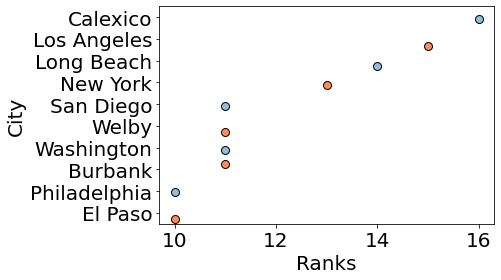

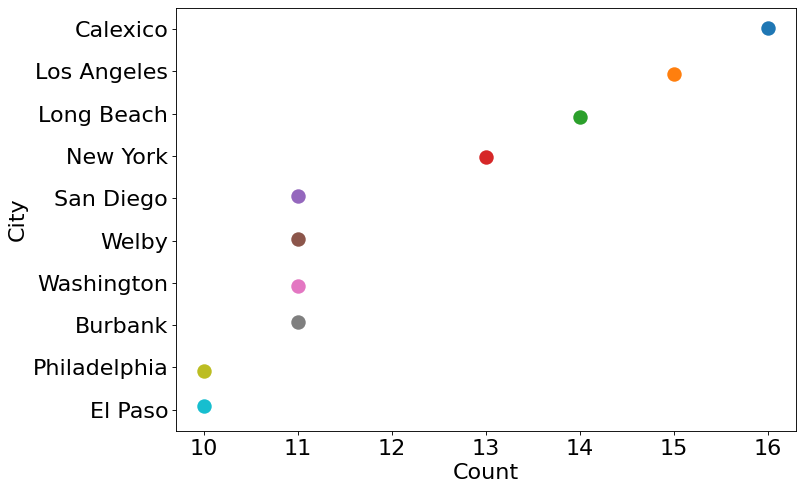

In [369]:
# Import Data
import matplotlib.pyplot as plt
import seaborn as sns
df_counts = df.Count
# Draw Stripplot
plt.rcParams['font.size'] = 20
params = dict(data=df,
              x='Count',
              y='City',
              #hue='SHOT_RESULT',
              #jitter=0.25,
              #order=sorted(players_to_use),
              dodge=True)
p = sns.stripplot(size=8,
                  jitter=0.35,
                  palette=['#91bfdb','#fc8d59'],
                  edgecolor='black',
                  linewidth=1,
                  **params)
plt.xlabel('Ranks')
plt.ylabel('City')
#plt.gca().set_xlim(-0.5,3.5)
#xlabs = p.get_xticklabels()
#xlabs[0].set_text('JJ Redick')

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)    
sns.stripplot(df_counts,df.City,size=13, ax=ax)

# Decorations
#plt.title('Counts Plot - Maximum occurence in top polluted over 17 years', fontsize=14)
#plt.show()

In [183]:
df

,Unnamed: 0,State,City,Count
0,0,California,Calexico,16
1,1,California,Los Angeles,15
2,2,California,Long Beach,14
3,3,New York,New York,13
4,4,California,San Diego,11
5,5,Colorado,Welby,11
6,6,District Of Columbia,Washington,11
7,7,California,Burbank,11
8,8,Pennsylvania,Philadelphia,10
9,9,Texas,El Paso,10


In [296]:
y = sqlContext.sql("select Years, Mean(Deaths) as meandeaths from Death_Data_Set where Years>=2000 and Years<2016 group by Years order by Years")
df2 = y.toPandas()
df2

,Years,meandeaths
0,2000,15054.353147
1,2001,15090.150350
2,2002,15252.657343
3,2003,15246.164336
4,2004,14901.216783
5,2005,15167.825175
6,2006,14968.321678
7,2007,14930.115385
8,2008,15192.185315
9,2009,14949.874126


In [311]:
x = sqlContext.sql("select Mean(`NO2 AQI`) as `NO2 AQI Mean`, Mean(`SO2 AQI`) as `SO2 AQI Mean`, Mean(`O3 AQI`) as `O3 AQI Mean`, Mean(`CO AQI`) as `CO AQI Mean`, YEAR(Date) as Yearly from Pollution_Data where YEAR(date)<2016 group by YEAR(Date) order by YEAR(Date)")
df = x.toPandas()
df

,NO2 AQI Mean,SO2 AQI Mean,O3 AQI Mean,CO AQI Mean,Yearly
0,30.969971,14.257266,36.018528,9.540111,2000
1,31.312336,12.835229,37.639492,8.792794,2001
2,29.362276,11.030911,39.560711,8.486661,2002
3,28.332485,11.327609,36.641705,8.246795,2003
4,26.946582,11.247233,34.727521,7.412931,2004
5,27.417807,11.186187,37.011672,6.893456,2005
6,26.994615,10.006128,36.200766,6.966187,2006
7,24.966103,9.055128,36.416717,6.030215,2007
8,23.492376,7.309846,35.421844,5.320949,2008
9,21.710276,5.443967,32.960394,5.162154,2009


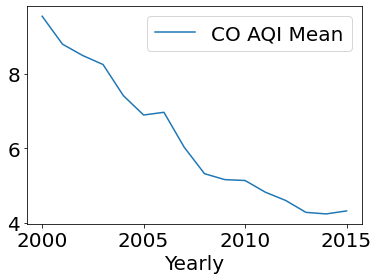

In [315]:
df=df.astype(float)
df.plot(x='Yearly', y='CO AQI Mean')

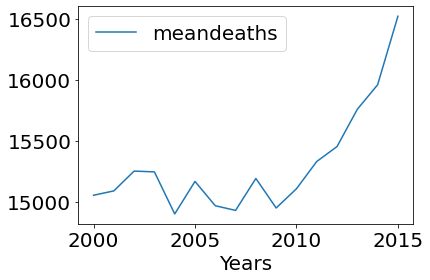

In [297]:
df2=df2.astype(float)
df2.plot(x='Years', y='meandeaths')

In [390]:
x = sqlContext.sql("SELECT SUM(deaths) as `Total Deaths`,`113 Cause Name` as Causes From Death_Data_Set WHERE State != 'United States' and Years>=2000 and Years<2017 GROUP By `113 Cause Name` ORDER BY MAX(Deaths) DESC")
df = x.toPandas()
df


,Total Deaths,Causes
0,42523667.0,All Causes
1,10849991.0,"Diseases of heart (I00-I09,I11,I13,I20-I51)"
2,9694698.0,Malignant neoplasms (C00-C97)
3,2412774.0,Cerebrovascular diseases (I60-I69)
4,1328876.0,Alzheimer's disease (G30)
5,2310545.0,Chronic lower respiratory diseases (J40-J47)
6,2080024.0,"Accidents (unintentional injuries) (V01-X59,Y8..."
7,1247980.0,Diabetes mellitus (E10-E14)
8,975239.0,Influenza and pneumonia (J09-J18)
9,620644.0,"Intentional self-harm (suicide) (*U03,X60-X84,..."


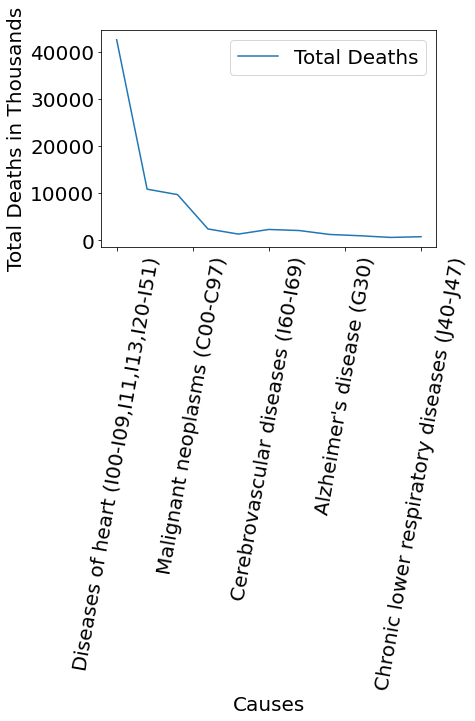

In [391]:
#df=df.astype(float)
df["Total Deaths"] = pd.to_numeric(df["Total Deaths"], downcast="float")
df["Total Deaths"] = df["Total Deaths"].map(lambda x: x/1000)
ax = df.plot(x='Causes', y='Total Deaths')
ax.set_xlabel("Causes")
ax.set_ylabel("Total Deaths in Thousands")
ax.set_xticklabels(df['Causes'], rotation=80)
ax = ax.get_figure()

In [114]:
#all_data.to_csv("Predicted_temperatures_DT.csv")Temperature_Pollution_Dataset
import pandas as pd
dataFrame=pd.read_csv("GlobalLandTemperaturesByCity.csv")

#sqlContext.sql("select * from City_data where city_data.Country=`United States`").show()


In [135]:
#dataFrame = dataFrame.toDF().toPandas()
dataFrame = dataFrame.loc[dataFrame['Country'] == 'United States']
dataFrame = dataFrame.rename(columns={'dt': 'Year'})
dataFrame['Year'] =  pd.to_datetime(dataFrame['Year'], format='%Y-%m-%d')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687289 entries, 47555 to 8439246
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Year                           687289 non-null  datetime64[ns]
 1   AverageTemperature             661524 non-null  float64       
 2   AverageTemperatureUncertainty  661524 non-null  float64       
 3   City                           687289 non-null  object        
 4   Country                        687289 non-null  object        
 5   Latitude                       687289 non-null  object        
 6   Longitude                      687289 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 41.9+ MB


In [142]:
all_data['Year'] =  pd.to_datetime(all_data['Year'], format='%Y-%m-%d')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   218 non-null    datetime64[ns]
 1   City                   218 non-null    object        
 2   Max_NO2_AQI            218 non-null    float64       
 3   Max_SO2_AQI            218 non-null    float64       
 4   Max_CO_AQI             218 non-null    float64       
 5   Max_O3_AQI             218 non-null    float64       
 6   Temperature_Predicted  218 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.0+ KB


In [240]:
#dataFrame.join(all_data.set_index('Year', 'City'))
joined = pd.merge(left=dataFrame, right=all_data, on='City', how="left")

In [241]:
joined = joined[(joined.AverageTemperature.isnull() == False) & (joined.Temperature_Predicted.isnull() == False)]
joined = joined.groupby(['City'])
joined.head(10)

,Year_x,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year_y,Max_NO2_AQI,Max_SO2_AQI,Max_CO_AQI,Max_O3_AQI,Temperature_Predicted
5564,1820-01-01,-3.420,3.182,Albuquerque,United States,34.56N,107.03W,2014-01-01,43.0,92.0,15.0,87.0,13.930963
5565,1820-01-01,-3.420,3.182,Albuquerque,United States,34.56N,107.03W,2015-01-05,45.0,9.0,16.0,101.0,15.377057
5566,1820-02-01,1.493,2.710,Albuquerque,United States,34.56N,107.03W,2014-01-01,43.0,92.0,15.0,87.0,13.930963
5567,1820-02-01,1.493,2.710,Albuquerque,United States,34.56N,107.03W,2015-01-05,45.0,9.0,16.0,101.0,15.377057
5568,1820-03-01,4.995,2.273,Albuquerque,United States,34.56N,107.03W,2014-01-01,43.0,92.0,15.0,87.0,13.930963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822942,1744-04-01,12.606,2.132,Washington,United States,39.38N,76.99W,2016-03-04,55.0,11.0,9.0,93.0,20.909459
822943,1744-05-01,17.740,1.668,Washington,United States,39.38N,76.99W,2014-01-01,62.0,40.0,25.0,133.0,13.930963
822944,1744-05-01,17.740,1.668,Washington,United States,39.38N,76.99W,2015-01-01,60.0,26.0,17.0,126.0,19.096125
822945,1744-05-01,17.740,1.668,Washington,United States,39.38N,76.99W,2016-03-04,55.0,11.0,9.0,93.0,20.909459


In [371]:
#joined = joined['AverageTemperature'].clip(joined['AverageTemperature'].mean()-2, joined['AverageTemperature'].mean()+2)
print(len(joined))

joined.head(10)

43


,Year_x,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year_y,Max_NO2_AQI,Max_SO2_AQI,Max_CO_AQI,Max_O3_AQI,Temperature_Predicted
5564,1820-01-01,-3.420,3.182,Albuquerque,United States,34.56N,107.03W,2014-01-01,43.0,92.0,15.0,87.0,13.930963
5565,1820-01-01,-3.420,3.182,Albuquerque,United States,34.56N,107.03W,2015-01-05,45.0,9.0,16.0,101.0,15.377057
5566,1820-02-01,1.493,2.710,Albuquerque,United States,34.56N,107.03W,2014-01-01,43.0,92.0,15.0,87.0,13.930963
5567,1820-02-01,1.493,2.710,Albuquerque,United States,34.56N,107.03W,2015-01-05,45.0,9.0,16.0,101.0,15.377057
5568,1820-03-01,4.995,2.273,Albuquerque,United States,34.56N,107.03W,2014-01-01,43.0,92.0,15.0,87.0,13.930963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822942,1744-04-01,12.606,2.132,Washington,United States,39.38N,76.99W,2016-03-04,55.0,11.0,9.0,93.0,20.909459
822943,1744-05-01,17.740,1.668,Washington,United States,39.38N,76.99W,2014-01-01,62.0,40.0,25.0,133.0,13.930963
822944,1744-05-01,17.740,1.668,Washington,United States,39.38N,76.99W,2015-01-01,60.0,26.0,17.0,126.0,19.096125
822945,1744-05-01,17.740,1.668,Washington,United States,39.38N,76.99W,2016-03-04,55.0,11.0,9.0,93.0,20.909459


/Users/mukuljangid/.local/share/virtualenvs/mukuljangid-byCJiSxj/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/mukuljangid/.local/share/virtualenvs/mukuljangid-byCJiSxj/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/mukuljangid/.local/share/virtualenvs/mukuljangid-byCJiSxj/lib/python3.7/site-packages/pandas/pl

/Users/mukuljangid/.local/share/virtualenvs/mukuljangid-byCJiSxj/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/mukuljangid/.local/share/virtualenvs/mukuljangid-byCJiSxj/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


City
Albuquerque       AxesSubplot(0.125,0.125;0.775x0.755)
Austin            AxesSubplot(0.125,0.125;0.775x0.755)
Baton Rouge       AxesSubplot(0.125,0.125;0.775x0.755)
Birmingham        AxesSubplot(0.125,0.125;0.775x0.755)
Boston            AxesSubplot(0.125,0.125;0.775x0.755)
Burbank           AxesSubplot(0.125,0.125;0.775x0.755)
Charlotte         AxesSubplot(0.125,0.125;0.775x0.755)
Cincinnati        AxesSubplot(0.125,0.125;0.775x0.755)
Cleveland         AxesSubplot(0.125,0.125;0.775x0.755)
Concord           AxesSubplot(0.125,0.125;0.775x0.755)
Costa Mesa        AxesSubplot(0.125,0.125;0.775x0.755)
Dallas            AxesSubplot(0.125,0.125;0.775x0.755)
Denver            AxesSubplot(0.125,0.125;0.775x0.755)
Des Moines        AxesSubplot(0.125,0.125;0.775x0.755)
El Paso           AxesSubplot(0.125,0.125;0.775x0.755)
Fontana           AxesSubplot(0.125,0.125;0.775x0.755)
Fresno            AxesSubplot(0.125,0.125;0.775x0.755)
Hampton           AxesSubplot(0.125,0.125;0.775x0.755)
Houst

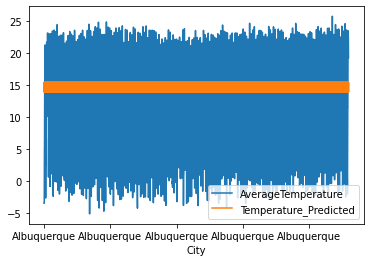

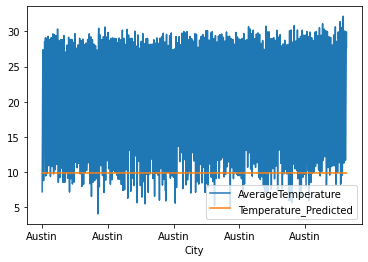

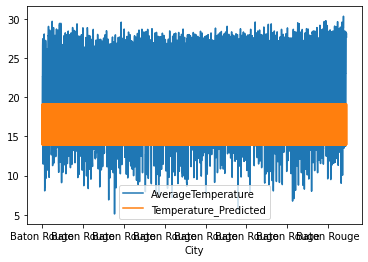

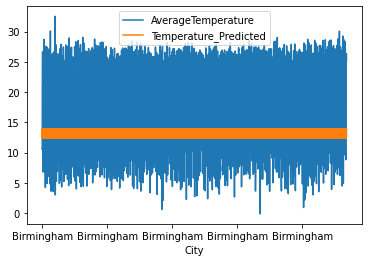

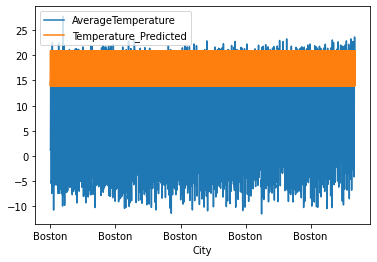

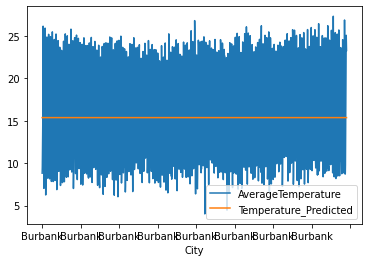

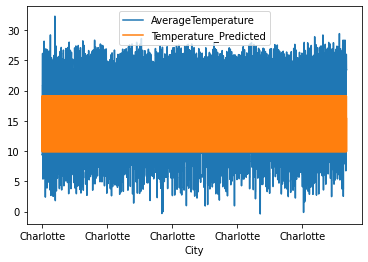

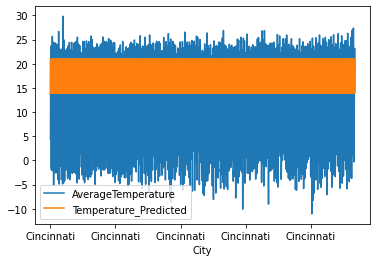

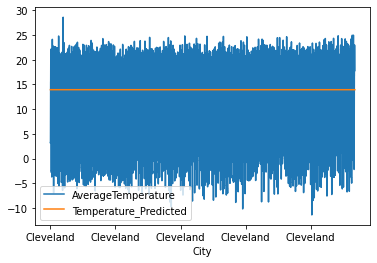

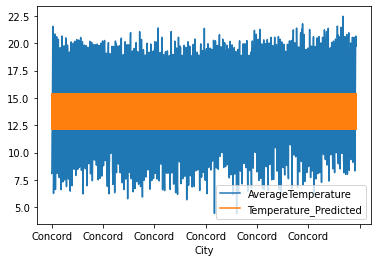

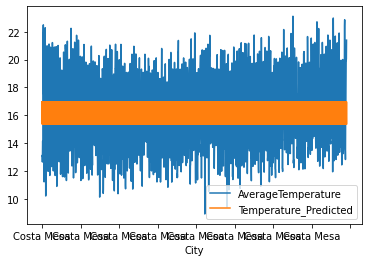

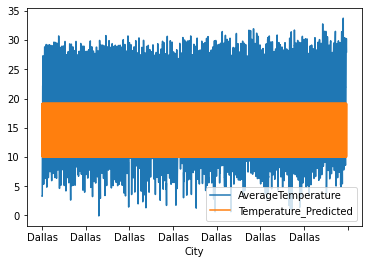

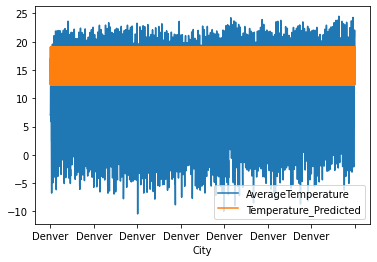

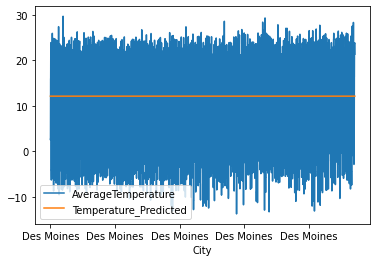

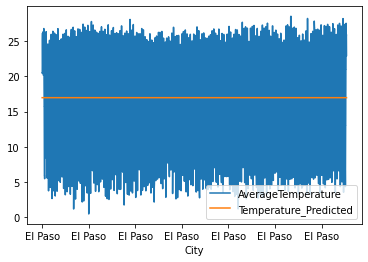

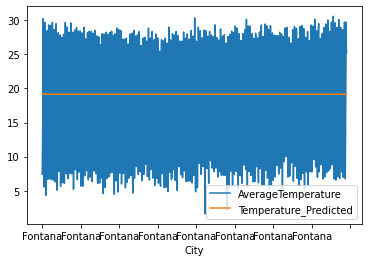

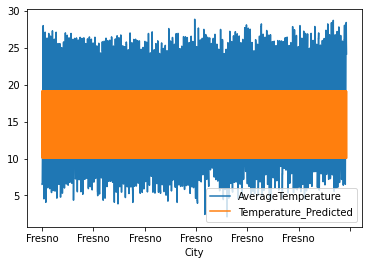

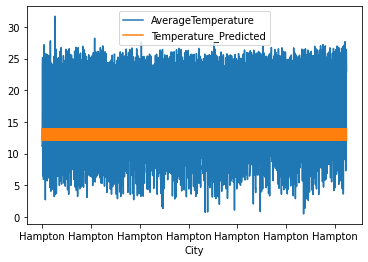

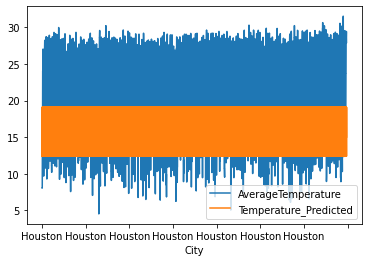

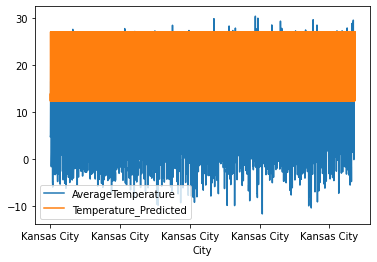

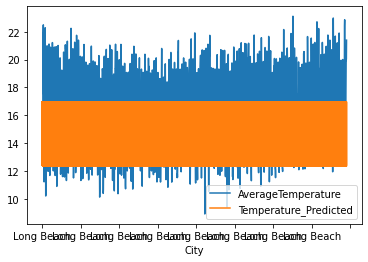

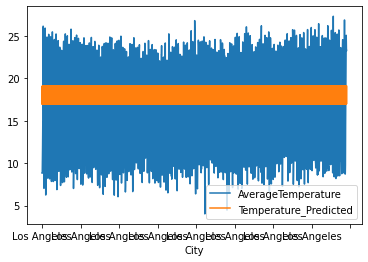

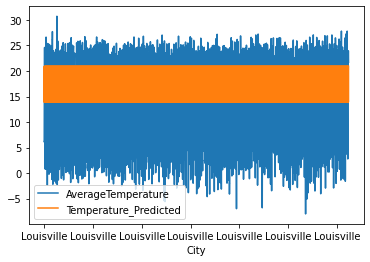

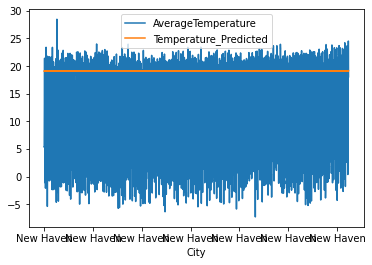

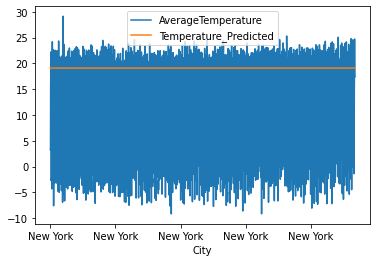

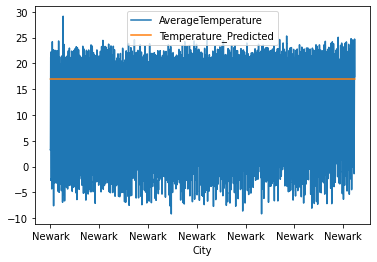

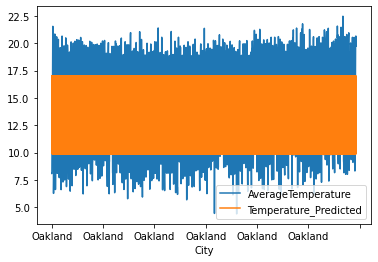

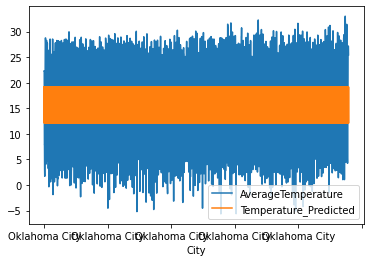

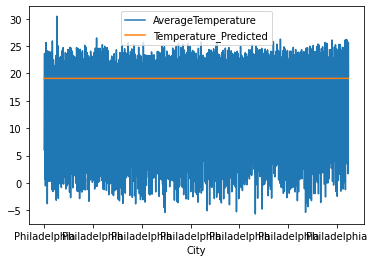

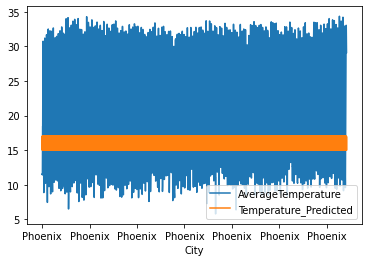

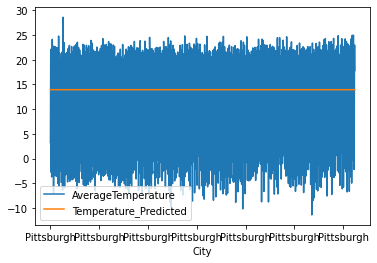

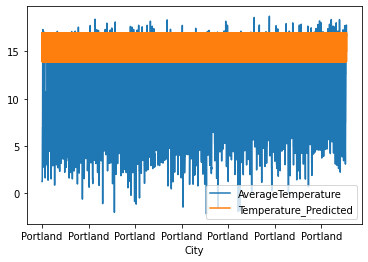

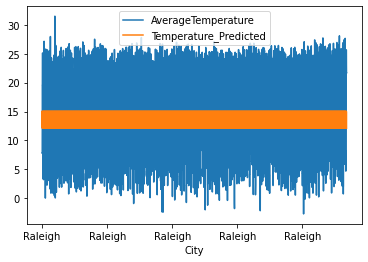

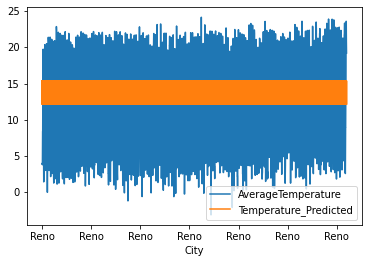

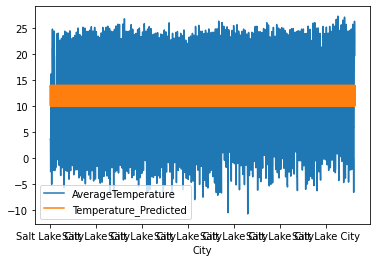

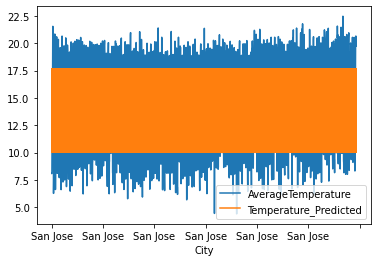

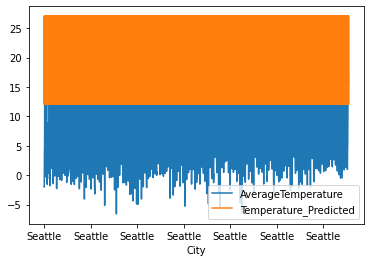

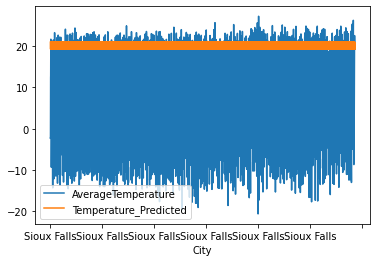

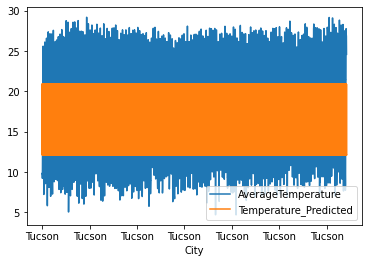

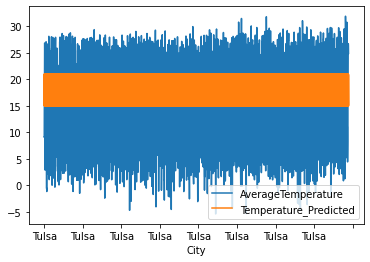

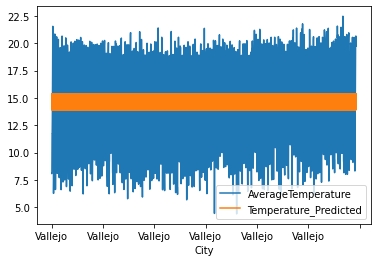

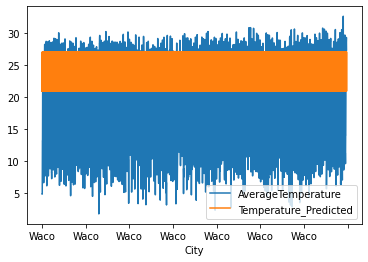

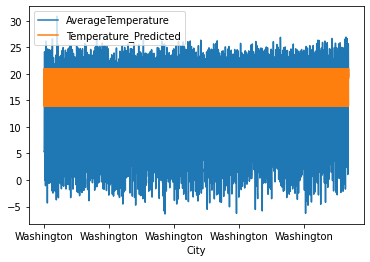

In [235]:
joined.plot(x='City', y=['AverageTemperature','Temperature_Predicted'])